In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 140 # 200 e.g. is really fine, but slower
from scipy import fft, signal
import scipy
from scipy.io.wavfile import read


Nyquist–Shannon sampling theorem: Theorem — If a function 
x(t) contains no frequencies higher than B hertz, then it can be completely determined from its ordinates at a sequence of points spaced less than 1/(2B) seconds apart.

Humans can hear up to 20k Hz, but music may stop around 10k Hz: https://www.idrumtune.com/ultimate-guide-to-musical-frequencies/
Therefore we will samepl at most 20kHz based on the Nyquist-Shannon Sampling Theorem

We are going to use 1 channel wav files for simplicity

Going to store the audio signature in a json. We choose this as opposed to a pickle because it is easier to store json in a database

In [31]:
# Fs, audio = read("recording1.wav")
Fs, audio = read("project/data/unit_testing/test.wav")
print(Fs, audio.shape)

44100 (441000,)


In [32]:
audio

array([  -1,   -1,   -1, ..., 1155,  134, -339], dtype=int16)

In [33]:
Fs = 20000

In [34]:
window_length_seconds = 1
window_length_samples = int(window_length_seconds * Fs)
window_length_samples += window_length_samples % 2
num_peaks = 15

In [35]:
amount_to_pad = window_length_samples - audio.size % window_length_samples
print(amount_to_pad)

19000


In [36]:
song_input = np.pad(audio, (0, amount_to_pad))
print(song_input.shape)

(460000,)


In [37]:
frequencies, times, stft = signal.stft(
        song_input, Fs, nperseg=window_length_samples, nfft=window_length_samples, return_onesided=True
    )

In [40]:
frequencies.shape

(10001,)

In [41]:
times.shape

(69,)

In [42]:
stft.shape

(10001, 69)

In [22]:
stft[0]

array([ -0.02708196+0.j,   0.17753254+0.j,   0.8984481 +0.j,
         0.4253543 +0.j,  -0.07594589+0.j,  -0.14097664+0.j,
         0.7948187 +0.j,   0.87120473+0.j,  -0.7900683 +0.j,
        -0.29145873+0.j,  -1.2372764 +0.j,  -0.7739629 +0.j,
        -1.5789266 +0.j,   0.39589223+0.j,  -0.19234513+0.j,
         0.79933685+0.j,  -1.1327817 +0.j,  -1.3222799 +0.j,
        -1.8979383 +0.j,  -0.2665289 +0.j,   1.0582772 +0.j,
       -13.657913  +0.j,  -4.083858  +0.j,  -0.8847515 +0.j,
         3.5624177 +0.j,   4.2542825 +0.j,  -0.6533988 +0.j,
         0.5383212 +0.j,   4.584577  +0.j,   0.05794499+0.j,
         0.        +0.j], dtype=complex64)

In [47]:
stft.T[0]

(10001,)

In [48]:
spectrum = abs(stft.T[0])
        # Find peaks - these correspond to interesting features
        # Note the distance - want an even spread across the spectrum
peaks, props = signal.find_peaks(spectrum, prominence=0, distance=200)

In [51]:
song = audio

(0.0, 5000.0)

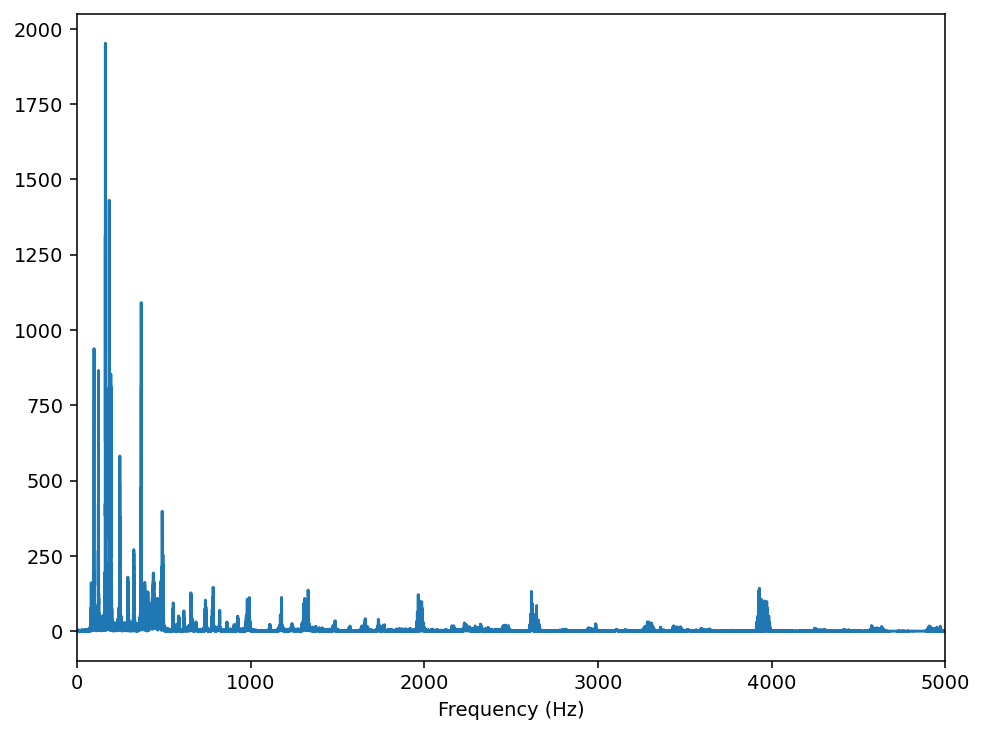

In [53]:
N = len(song)
fft = scipy.fft.fft(song)
transform_y = 2.0 / N * np.abs(fft[0:N//2])
transform_x = scipy.fft.fftfreq(N, 1 / Fs)[:N//2]
plt.plot(transform_x, transform_y)
plt.xlabel("Frequency (Hz)");
plt.xlim([0, 5000])

In [49]:
peaks

array([  74,  297,  596,  832, 1134, 1361, 1587, 1814, 2041, 2268, 2649,
       2894, 3117, 3356, 3583, 3859, 4113, 4439, 4754, 4977, 5342, 5625,
       5960, 6279, 6579, 6800, 7124, 7327, 7658, 7880, 8155, 8368, 8626,
       8978, 9224, 9427, 9820])

In [50]:
props

{'prominences': array([1.30696183, 0.38998584, 0.10774255, 0.10225284, 0.12483997,
        0.08980787, 0.03135394, 0.06311977, 0.01347199, 0.01981467,
        0.00820156, 0.00668482, 0.00385356, 0.00546681, 0.00370945,
        0.00528244, 0.00571282, 0.00710779, 0.00596096, 0.00503987,
        0.00593561, 0.00647438, 0.0056094 , 0.00580239, 0.00396964,
        0.0059711 , 0.004135  , 0.0055445 , 0.00357969, 0.0035812 ,
        0.0040547 , 0.004372  , 0.00481224, 0.00445893, 0.00409085,
        0.00568295, 0.00442644]),
 'left_bases': array([  27,  267,  502,  723,  723, 1334, 1529, 1529, 2020, 2244, 2478,
        2883, 3103, 3103, 3553, 3449, 3103, 3103, 4575, 4829, 5236, 5496,
        5724, 5724, 6559, 6741, 7086, 7153, 7638, 7638, 7398, 7398, 7398,
        8952, 9204, 7398, 9604]),
 'right_bases': array([7398, 7398,  723,  847, 7398, 7398, 1622, 7398, 2244, 7398, 7398,
        3103, 3135, 4098, 3650, 4098, 4260, 7398, 5496, 5236, 5496, 7398,
        5974, 6741, 6587, 7398, 7153, 7398

In [38]:
def create_constellation(audio, Fs):
    # Parameters
    window_length_seconds = 0.5
    window_length_samples = int(window_length_seconds * Fs)
    window_length_samples += window_length_samples % 2
    num_peaks = 15

    # Pad the song to divide evenly into windows
    amount_to_pad = window_length_samples - audio.size % window_length_samples

    song_input = np.pad(audio, (0, amount_to_pad))

    # Perform a short time fourier transform
    frequencies, times, stft = signal.stft(
        song_input, Fs, nperseg=window_length_samples, nfft=window_length_samples, return_onesided=True
    )

    constellation_map = []

    for time_idx, window in enumerate(stft.T):
        # Spectrum is by default complex. 
        # We want real values only
        spectrum = abs(window)
        # Find peaks - these correspond to interesting features
        # Note the distance - want an even spread across the spectrum
        peaks, props = signal.find_peaks(spectrum, prominence=0, distance=200)

        # Only want the most prominent peaks
        # With a maximum of 15 per time slice
        n_peaks = min(num_peaks, len(peaks))
        # Get the n_peaks largest peaks from the prominences
        # This is an argpartition
        # Useful explanation: https://kanoki.org/2020/01/14/find-k-smallest-and-largest-values-and-its-indices-in-a-numpy-array/
        largest_peaks = np.argpartition(props["prominences"], -n_peaks)[-n_peaks:]
        for peak in peaks[largest_peaks]:
            frequency = frequencies[peak]
            constellation_map.append([time_idx, frequency])

    return constellation_map

def create_hashes(constellation_map, song_id=None):
    hashes = {}
    # Use this for binning - 23_000 is slighlty higher than the maximum
    # frequency that can be stored in the .wav files, 22.05 kHz
    upper_frequency = 23_000 
    frequency_bits = 10

    # Iterate the constellation
    for idx, (time, freq) in enumerate(constellation_map):
        # Iterate the next 100 pairs to produce the combinatorial hashes
        # When we produced the constellation before, it was sorted by time already
        # So this finds the next n points in time (though they might occur at the same time)
        for other_time, other_freq in constellation_map[idx : idx + 100]: 
            diff = other_time - time
            # If the time difference between the pairs is too small or large
            # ignore this set of pairs
            if diff <= 1 or diff > 10:
                continue

            # Place the frequencies (in Hz) into a 1024 bins
            freq_binned = freq / upper_frequency * (2 ** frequency_bits)
            other_freq_binned = other_freq / upper_frequency * (2 ** frequency_bits)

            # Produce a 32 bit hash
            # Use bit shifting to move the bits to the correct location
            hash = int(freq_binned) | (int(other_freq_binned) << 10) | (int(diff) << 20)
            hashes[hash] = (time, song_id)
    return hashes



In [39]:
# Read the input WAV files
# Fs is the sampling frequency of the file
Fs, song = read("project/data/unit_testing/test.wav")

# test_signature = create_constellation(song, Fs)
# # Transform [(x, y), ...] into ([x1, x2...], [y1, y2...]) for plotting using zip
# plt.scatter(*zip(*test_signature))

In [40]:
test_signature = create_constellation(song, Fs)

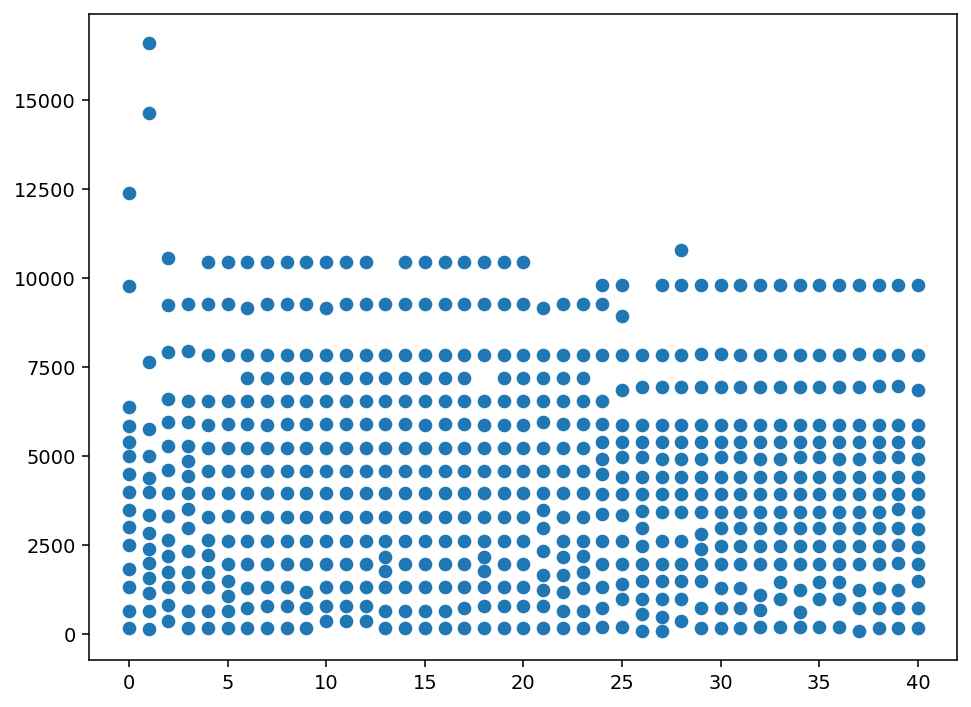

In [41]:
plt.scatter(*zip(*test_signature))

In [55]:
import json
directory = "project/data/unit_testing/test.json"

# Write to a file
with open(directory, 'w') as file:
    json.dump(test_signature, file)

# Read from a file
# with open('data.json', 'r') as file:
#     loaded_data = json.load(file)